In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#from pandas_profiling import ProfileReport
#from autoviz.AutoViz_Class import AutoViz_Class as AVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
raw_data = pd.read_csv('C:\\Users\\Fabulous\\Downloads\\Data\\Placement_Data_Full_Class.csv')
raw_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
raw_data.describe(include='all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [4]:
raw_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#To generate a quick indepth EDA analysis

profile = ProfileReport(raw_data, title = 'Pandas Profiling Report')
profile

#To get visualizations about the data. output is a variation of different charts eg scatter plots, histograms etc
avc = AVC()
data_viz = avc.AutoViz('C:\\Users\\Fabulous\\Downloads\\Data\\Placement_Data_Full_Class.csv')
data_viz

In [5]:
raw_data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [6]:
raw_data['salary'] = raw_data['salary'].fillna(0)
raw_data['salary'].isnull().sum()

0

In [7]:
raw_data['salary'].skew()

0.446645631452824

The skewness lies between -0.5 and 0.5, so the distribution of salary is approximately symmetric

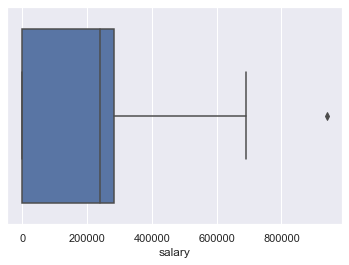

In [8]:
sns.boxplot(raw_data['salary'])

The boxplot shows that a lot of individuals were offered salaries in the range of 0k - 200k, with 0k representing those who were not placed with companies. 

## Exploratory Data Analysis

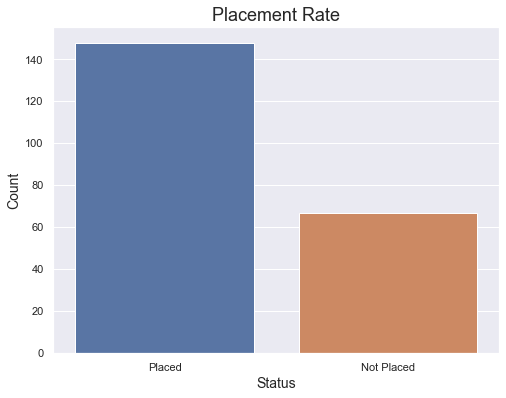

In [9]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data= raw_data, x = 'status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Placement Rate', fontsize = 18)
plt.show()

A lot more people were placed with companies. The ratio of the placement rate (being placed compared to not being placed) is about 2:1.

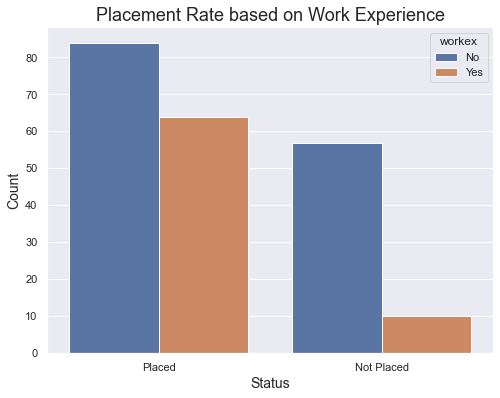

In [10]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data= raw_data, hue = 'workex', x = 'status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Placement Rate based on Work Experience', fontsize = 18)
plt.show()

Work experience doesnt seem to have an impact on placement rate. Individuals with or without work experience were still placed with companies. However, individuals without work experience had  a higher chance of not being placed compared to those with work experience. Generally, a lot of other factors are often considered in addition to having work experience. For example, cultural fit, performance at the interview stage etc. 

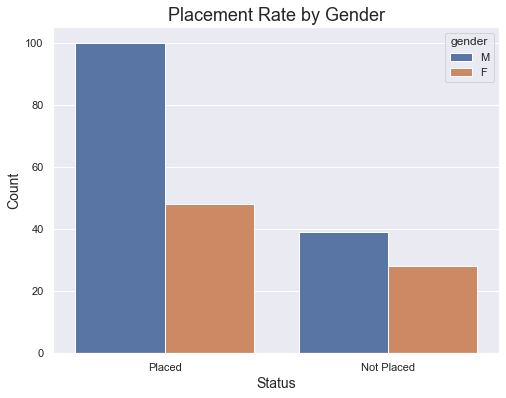

In [11]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data= raw_data, hue = 'gender', x = 'status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Placement Rate by Gender', fontsize = 18)
plt.show()

Men had a much significant placement rate with companies than women.

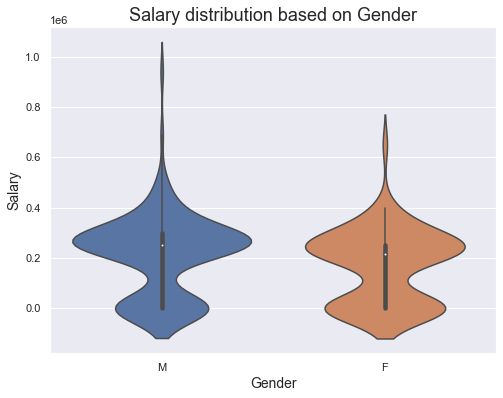

In [12]:
fig = plt.figure(figsize=(8,6))
sns.violinplot(data= raw_data, x = 'gender', y = 'salary')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.title('Salary distribution based on Gender', fontsize = 18)
plt.show()

Men were offered higher salaries than women. This is a prevalent issue in our society. Men are generally offered higher salaries than women.

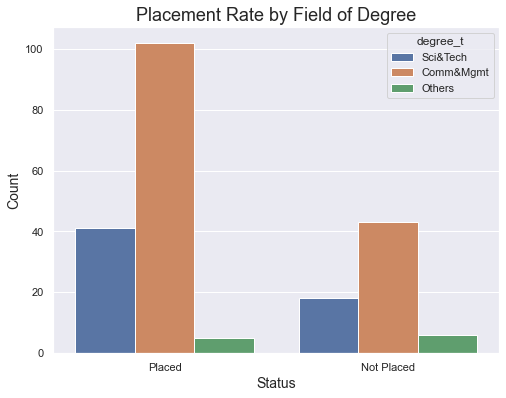

In [13]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data= raw_data, hue = 'degree_t', x = 'status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Placement Rate by Field of Degree', fontsize = 18)
plt.show()

Individuals with a degree in field of communications & management had a significant chance of getting placed compared to individuals with a degree in other fields (Science & Technology and Others). They also had a higher salary distribution as seen in the chart below.
Individuals with a degree in 'Others' field had the lowest chance of not getting placed as well as the lowest salary distribution.

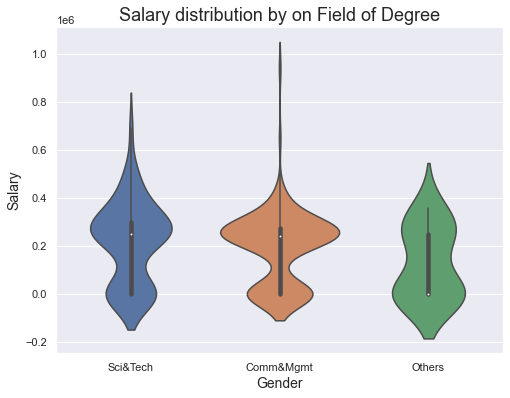

In [14]:
fig = plt.figure(figsize=(8,6))
sns.violinplot(data= raw_data, x = 'degree_t', y = 'salary')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.title('Salary distribution by on Field of Degree', fontsize = 18)
plt.show()

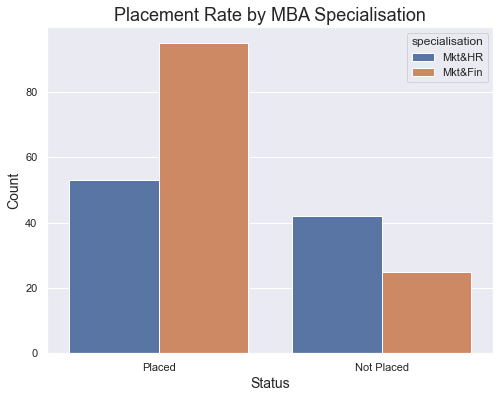

In [15]:
fig = plt.figure(figsize=(8,6))
sns.countplot(data= raw_data, hue = 'specialisation', x = 'status')
plt.xlabel('Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Placement Rate by MBA Specialisation', fontsize = 18)
plt.show()

People with an MBA specialisation in marketing & finance had a significant placement rate than people with an MBA specialisation in Marketing & HR. 
People with an MBA specialisation in Marketing & HR also had a higher chance of not being placed with companies compared to those with an MBA specialisation in marketing & finance. If at this time period, companies had a much higher demand for people with a degree in marketing & finance, it could lead to such individuals having a higher placement rate than those with a degree in marketing & HR. These individuals also had a much higher salary distribution than those with a specialisation in marketing & HR.

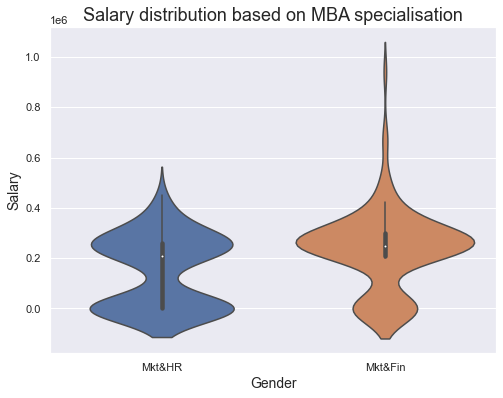

In [16]:
fig = plt.figure(figsize=(8,6))
sns.violinplot(data= raw_data, x = 'specialisation', y = 'salary')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.title('Salary distribution based on MBA specialisation', fontsize = 18)
plt.show()

In [17]:
placement_data = raw_data.copy()
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [18]:
X = placement_data.drop(['sl_no','status','salary'], axis = 1)
y = placement_data['status']

In [19]:
#Machine Learning models take just numbers so any string values we have in our data will have to be converted to numbers.

#Using Column Transformer and One Hot Encoder rather than Label Encoder and One Hot Encoder as both give the same results.
#Using this method is however more effcient since i use just two lines of code.

#One Hot Encoder sorts the values for each column in ascending order and encodes each category based on this order. Eg male and 
#female, female will have a value of 1, 0 and male 0, 1. The output from One Hot Encoding puts the encoded columns first and 
#then the other columns that were not encoded.

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 4, 5, 7, 8, 10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
print(X[:1])

[[ 0.   1.   0.   1.   0.   1.   0.   1.   0.   0.   0.   1.   1.   0.
   0.   1.  67.  91.  58.  55.  58.8]]


In [21]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [22]:
print(y[:5])

[1 1 1 0 1]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
models = [LogisticRegression(max_iter = 1500), 
          KNeighborsClassifier(),
          SVC(kernel = 'linear'), 
          SVC(kernel = 'rbf'), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          XGBClassifier(),
          LGBMClassifier(),
          ExtraTreesClassifier()]

a, b, c, d = [], [], [], []

for i in models:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a.append(accuracy_score(y_test, y_pred))
    b.append(f1_score(y_test, y_pred))
    c.append(precision_score(y_test, y_pred))
    d.append(recall_score(y_test, y_pred))
    
class_metrics = pd.DataFrame([a, b, c, d], index = ['Accuracy','F1 Score','Precision','Recall'], 
                             columns = ['Logistic Reg','KNN','SVM','KSVM','Naive Bayes','Decision Tree','Random Forest', 
                                        'XGBoost','LGBM','Extra Trees'])

class_metrics.transpose().sort_values(by='Accuracy', ascending=False)

,Accuracy,F1 Score,Precision,Recall
Logistic Reg,0.883721,0.920635,0.906250,0.935484
SVM,0.883721,0.920635,0.906250,0.935484
KSVM,0.860465,0.909091,0.857143,0.967742
Decision Tree,0.837209,0.885246,0.900000,0.870968
Random Forest,0.837209,0.892308,0.852941,0.935484
XGBoost,0.837209,0.892308,0.852941,0.935484
LGBM,0.837209,0.892308,0.852941,0.935484
Extra Trees,0.790698,0.865672,0.805556,0.935484
Naive Bayes,0.744186,0.819672,0.833333,0.806452
KNN,0.697674,0.811594,0.736842,0.903226


In addition to accuracy, f1-score, precison and recall can also be used to measure the classification model
Precison measure the ability of the model to not label positive values as negative.
Recall is the ability of the model to find positive vales.
F1-score is the weighted mean of precision and recall. The closer to 1 these values are, the better.

The logistic regression and SVM models have the same values across all four metrics. They also have high accuracy, f1, precison and recall scores. I will be using Logistic regression on the dataset.

In [26]:
log_classifier = LogisticRegression(max_iter = 1500)
log_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [27]:
log_pred = log_classifier.predict(X_test)

In [28]:
log_cm = confusion_matrix(y_test, log_pred)
print(log_cm)
accuracy_score(y_test, log_pred)

[[ 9  3]
 [ 2 29]]


0.8837209302325582

In [29]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



## Cross Validation

In [30]:
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 87.22 %


The cross validation accuracy is close to the accuracy predicted by the logistic regression. This shows that the model did not overfit or underfit the data.

In [31]:
log_classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Examining Feature Importance

Feature: 0, Score:-0.28282
Feature: 1, Score:0.28282
Feature: 2, Score:-0.11578
Feature: 3, Score:0.11578
Feature: 4, Score:0.08920
Feature: 5, Score:-0.08920
Feature: 6, Score:0.24556
Feature: 7, Score:-0.20549
Feature: 8, Score:0.08649
Feature: 9, Score:0.26441
Feature: 10, Score:-0.06469
Feature: 11, Score:-0.24606
Feature: 12, Score:-0.30198
Feature: 13, Score:0.30198
Feature: 14, Score:0.07522
Feature: 15, Score:-0.07522
Feature: 16, Score:2.06023
Feature: 17, Score:1.16007
Feature: 18, Score:1.28527
Feature: 19, Score:-0.13748
Feature: 20, Score:-0.94722


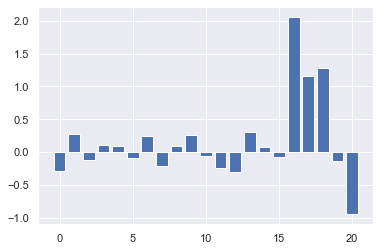

In [32]:
importance = log_classifier.coef_[0]
for i, v in enumerate(importance):
    print('Feature: %0d, Score:%.5f' % (i, v))
#plotting feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The positive scores indicate a feature that predicts class 1 while a negative score indicates a feature that predicts class 0.

In [33]:
placement_data.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [34]:
print(X[:1])

[[ 0.   1.   0.   1.   0.   1.   0.   1.   0.   0.   0.   1.   1.   0.
   0.   1.  67.  91.  58.  55.  58.8]]


1. The sl_no and salary columns were dropped for the machine learning models and one hot encoding was carried out on categorical columns
2. Features 0 and 1 - the two gender categories (M,F)
3. Feature 2 - ssc_p
4. Features 3 and 4 - the two ssc_b categories (Others, Central)
5. Feature 5 - hsc_p
6. Features 6 and 7 - the two hsc_b categories (Others, Central)
7. Features 8, 9 and 10 - the three hsc_s categories (Commerce, Science, Arts)
8. Feature 11 - degree_p
9. Features 12, 13 and 14 - three categories of degree_t (Comm & Mgmt, Sci & Tech, Others)
10. Features 15 and 16 - two categories of workex (No, Yes)
11. Feature 17 - etest_p
12. Features 18 and 19 - two categories of specialisation ( Mkt & HR, Mkt & Fin)
13. Feature 20 - mba_p

The variables that contribute heavily in the model are work experience (workex), employability test percentage (etest_p), mba post graduation specialisation (specialisation) and mba percentage (mba_p)